**CREDIT CARD CUSTOMERS**

In [ ]:
#Adquisión de datos, primeramente descargados desde Kaggle, luego subidos a un repositorio en GitHub y finalmente traídos a Colab
url='https://raw.githubusercontent.com/RodrigoOrtiz149/Data-Science-II/refs/heads/main/BankChurners.csv?token=GHSAT0AAAAAACZWEGJOOQBSAU6TQSUS5UIAZZA7D7Q'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Luego de importar las librerías avanzo con la lectura del archivo (raw del csv ubicado en GitHub)
df=pd.read_csv(url)

**ACERCA DEL DATASET**

El gerente de un banco está preocupado porque cada vez más clientes abandonan sus servicios de tarjetas de crédito. Por esta razón, es importante poder predecir quiénes serán los clientes que abandonen la cuenta para poder ir proactivamente a buscarlos y brindarles mejores servicios y cambiar sus decisiones en la dirección opuesta. este conjunto de datos consta de 10.000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

**Columnas**

1- Número de cliente. Identificador único del cliente titular de la cuenta

2- Variable de evento interno (actividad del cliente: Existente/agotado)

3- Edad del cliente en años

4- Género - M=Hombre, F=Mujer

5- Número de dependientes (cuentas dependientes)

6- Nivel educativo del titular de la cuenta

7- Estado civil

8- Categoría de ingresos anuales del titular de la cuenta

9- Categoría de tarjeta: tipo de tarjeta

10- Periodo de relación con el banco en meses

11- Número total de productos que posee el cliente

12- Número de meses inactivos en los últimos 12 meses

13- Número de contactos en los últimos 12 meses

14- Límite de crédito en la tarjeta de crédito

15- Saldo rotatorio total de la tarjeta de crédito (monto total de deuda que el titular de la tarjeta tiene pendiente de pago)

16- Línea de crédito abierta para comprar (promedio de los últimos 12 meses)

17- Cambio en el monto de las transacciones (cuarto trimestre respecto del primer trimestre)

18- Monto total de la transacción (últimos 12 meses)

19- Recuento total de transacciones (últimos 12 meses)

20- Cambio en el recuento de transacciones (cuarto trimestre con respecto al primer trimestre)

21- Índice de utilización promedio de la tarjeta

22- Indicador predictivo sobre abandono

23- Indicador predictivo sobre abandono (1)





**OBJETIVO GENERAL**

Predecir el abandono de clientes

**Objetivos particulares**

1- Identificar clientes en riesgo (actuar de forma proactiva para identificar a aquellos clientes que tienen una alta probabilidad de abandonar el banco)

2- Entendimiento de las características de los clientes (analizar las variables que más influyen en el abandono para comprender mejor el comportamiento del cliente y filtrar de forma correcta)

Logrando este objetivo, el banco podrá desarrollar estrategias de retención y optimizar la utilización de los recursos (enfocar los esfuerzos en los clientes que más lo necesitan)

**HIPÓTESIS**

Antes de comenzar a conocer en profundidad el dataset y centrarse en en la etapa de ETL, se plantean diversas hipótesis que se buscarán explorar a lo largo del trabajo.

1- **Edad**: Los clientes más jóvenes tienen más probabilidades de abandonar el servicio de tarjetas de crédito que los clientes mayores.

2- **Ingreso**: Los clientes con ingresos más bajos tienden a abandonar el servicio de tarjetas de crédito más frecuentemente que aquellos con ingresos más altos.

3- **Estado Civil**: Los clientes solteros tienen una tasa de abandono más alta en comparación con los clientes casados.

4- **Utilización del crédito**: Los clientes con un alto promedio de utilización de crédito (Avg_Utilization_Ratio) son más propensos a abandonar su tarjeta de crédito.

5- **Inactividad**: Los clientes que han estado inactivos durante un período de tiempo prolongado (Months_Inactive_12_mon) tienen una mayor probabilidad de abandonar el servicio.

6- **Número de contactos**: Un mayor número de contactos con el banco (Contacts_Count_12_mon) puede estar asociado con una menor tasa de abandono.

7- **Período de relación**: los clientes con menos de 12 meses de relación con el banco tienen tendencia a abandonar el servicio.


**ETAPA ETL (Extract - Transform - Load)**

In [ ]:
#Conociendo el dataset
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
#Eliminación de las últimas 2 columnas. Estas características no aportan valor (son el resultado de indicadores predictivos)
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [ ]:
#Número de filas y columnas
filas, columnas = df.shape
print(f'filas: {filas}, columnas: {columnas}')

filas: 10127, columnas: 21


In [ ]:
#Últimas 5 filas del dataset
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
#Columnas
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#Breve análisis estadístico del dataset
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
#Conteo de datos perdidos
df.isnull().sum()
#No se observan datos perdidos

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
#Verificación de clientes repetidos a través del número de identificación
df.duplicated('CLIENTNUM').sum()

0

In [ ]:
#Conociendo posibles selecciones en la categoría "Variable de cliente" y los valores
df ['Attrition_Flag'].value_counts()
#Se observa que 1627 de 10127 clientes han abandonado los servicios de tarjetas de crédito

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [ ]:
#Conociendo posibles selecciones en la categoría "Nivel educativo del titular de la cuenta" y los valores
df ['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [ ]:
# % Género
gender_percentages = df['Gender'].value_counts(normalize=True) * 100
print(gender_percentages)

Gender
F    52.908068
M    47.091932
Name: proportion, dtype: float64


In [ ]:
#Estado civil
marital_status_counts=df['Marital_Status'].value_counts()
print(marital_status_counts)

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


In [ ]:
#Conociendo posibles selecciones en la categoría "Categoría de ingresos" y los valores
income_counts=df ['Income_Category'].value_counts()
# Defino orden personalizado
income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Ordeno el resultado usando el índice
sorted_income_counts = income_counts.reindex(income_order)

print(sorted_income_counts)

Income_Category
Unknown           1112
Less than $40K    3561
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
$120K +            727
Name: count, dtype: int64


In [ ]:
#Categorías de tarjetas
card_category_counts=df['Card_Category'].value_counts()
print(card_category_counts)

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


Análisis univariado

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


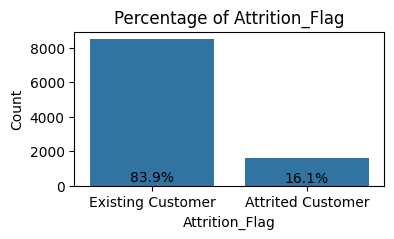

In [ ]:
#Variable de evento interno (actividad del cliente: Existente/agotado)
Attrition_Flag_percentages = df['Attrition_Flag'].value_counts(normalize=True) * 100
print(Attrition_Flag_percentages)
plt.figure(figsize=(4,2))
sns.countplot(data=df, x='Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')
plt.title('Percentage of Attrition_Flag')
# Añadir porcentajes en las barras
for i, percentage in enumerate(Attrition_Flag_percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')
plt.show()

In [ ]:
counts = df['Attrition_Flag'].value_counts().reset_index()
counts.columns = ['Attrition_Flag', 'Count']

fig = px.bar(counts, x='Attrition_Flag', y='Count',
             title='Count of Attrition Flag',
             text='Count',
             width=400, height=400)


fig.show()

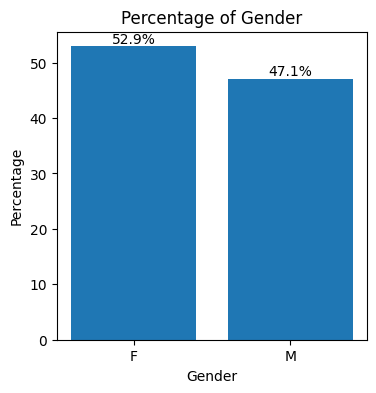

In [ ]:
#Género
plt.figure(figsize=(4, 4))
plt.bar(gender_percentages.index, gender_percentages.values)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Gender')

# Añadir porcentajes en las barras
for i, percentage in enumerate(gender_percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

<ipython-input-9-afaf0f8ab471>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Education_Level'] = pd.Categorical(df_filtered['Education_Level'], categories=order, ordered=True) #convertir columna en categórico con orden especifico


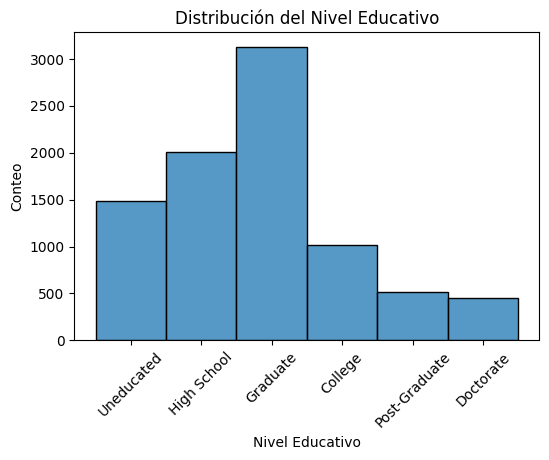

In [ ]:
#Nivel educativo de los clientes
order = ['Unknown','Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate']
df_filtered = df[df['Education_Level'] != 'Unknown'] #Saco el desconocido
df_filtered['Education_Level'] = pd.Categorical(df_filtered['Education_Level'], categories=order, ordered=True) #convertir columna en categórico con orden especifico
plt.figure(figsize=(6, 4))
sns.histplot(data=df_filtered, x='Education_Level')
plt.title('Distribución del Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

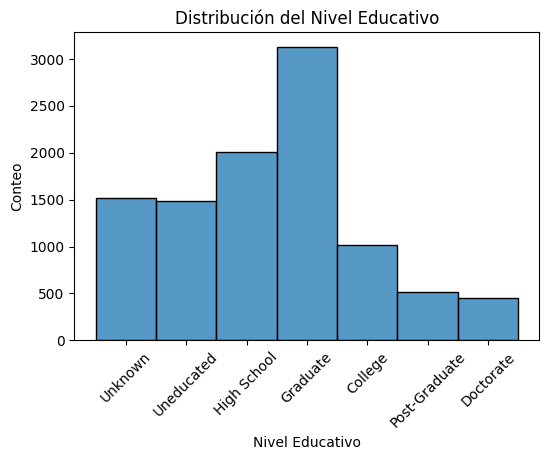

In [ ]:
#Mismo gráfico que el anterior, sin sacar a los que tienen "desconocido"
order = ['Unknown','Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate']
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=order, ordered=True) #convertir columna en categórico con orden especifico
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Education_Level')
plt.title('Distribución del Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

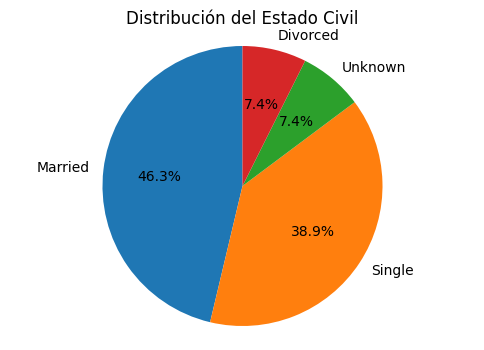

In [ ]:
#Estado civil
marital_status_count=df['Marital_Status'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(marital_status_count, labels=marital_status_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Estado Civil')
plt.axis('equal')
plt.show()

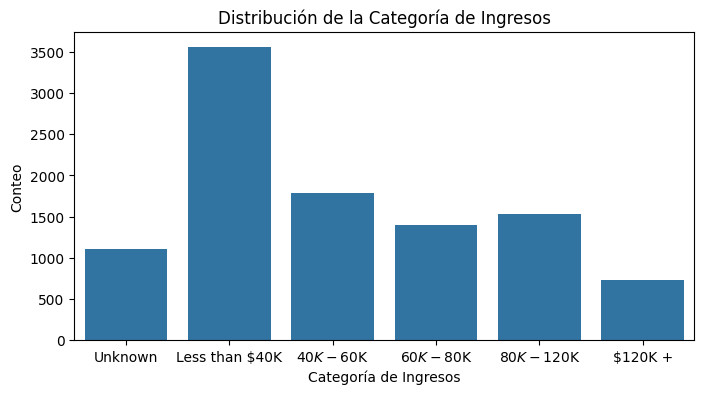

In [ ]:
#Categoría de ingresos
order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
income_counts = df['Income_Category'].value_counts().reindex(order)
plt.figure(figsize=(8,4))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Distribución de la Categoría de Ingresos')
plt.xlabel('Categoría de Ingresos')
plt.ylabel('Conteo')
plt.show()

Text(0.5, 0, 'Edad')

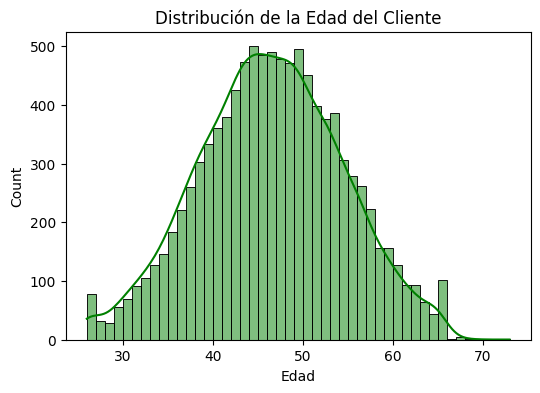

In [ ]:
#Edad del cliente
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Customer_Age', kde=True,color='green')
plt.title('Distribución de la Edad del Cliente')
plt.xlabel('Edad')

In [ ]:
#Cálculo de la moda, media y mediana de la distribución de las edades
moda = df['Customer_Age'].mode()
media = df['Customer_Age'].mean()
mediana = df['Customer_Age'].median()
print(f'Moda: {moda}')
print(f'Media: {media}')
print(f'Mediana: {mediana}')

Moda: 0    44
Name: Customer_Age, dtype: int64
Media: 46.32596030413745
Mediana: 46.0


Text(0.5, 1.0, 'Distribución del Limite de Crédito')

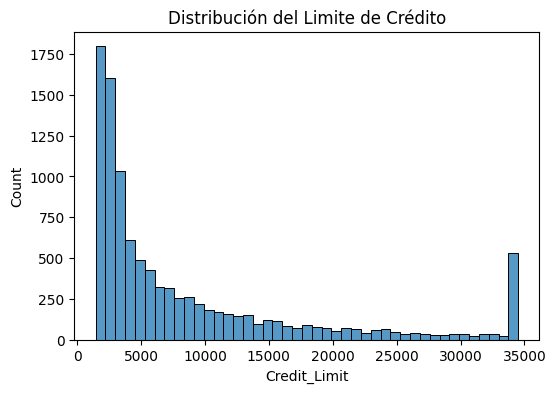

In [ ]:
#Limite de credito
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Credit_Limit')
plt.title('Distribución del Limite de Crédito')

Text(0.5, 1.0, 'Distribución del Limite de Crédito')

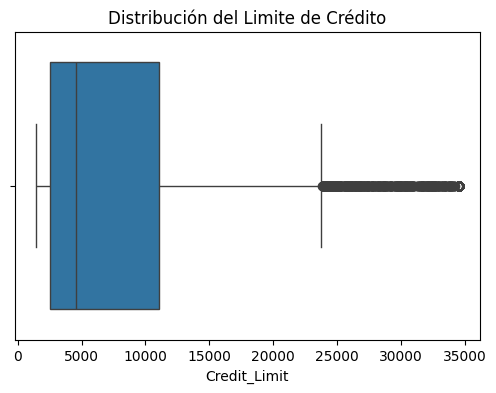

In [ ]:
#Limite de credito
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Credit_Limit')
plt.title('Distribución del Limite de Crédito')

Text(0.5, 1.0, 'Distribución del Indice de Utilización Promedio')

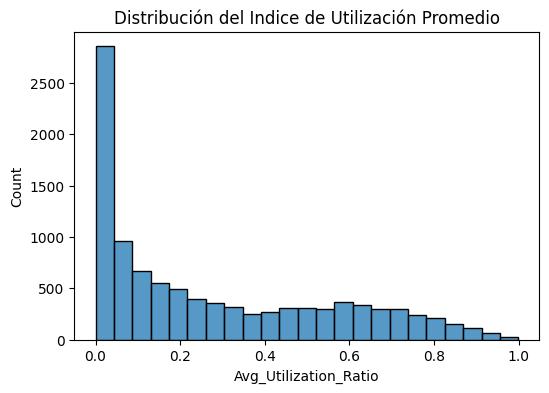

In [ ]:
#Indice de utilización promedio
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Avg_Utilization_Ratio')
plt.title('Distribución del Indice de Utilización Promedio')

Text(0.5, 1.0, 'Distribución del Número de Cuentas Dependientes')

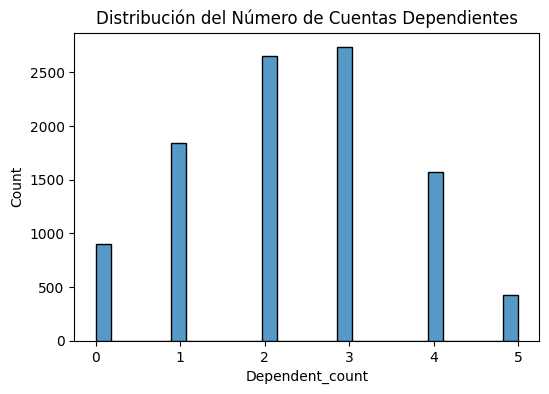

In [ ]:
#Cuentas dependientes
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Dependent_count')
plt.title('Distribución del Número de Cuentas Dependientes')

Análisis bivariado

Este análisis permitirá comenzar a responder ciertas preguntas planteadas al principio del trabajo. A su vez, se estudiará qué representación tienen los valores que aparecen como "desconocidos" en las variables de Estado civil, Categoría de ingresos y Nivel educativo. Esta representación se estudiará en base a los clientes que han abandonado los servicios, lo que es la variable objetivo

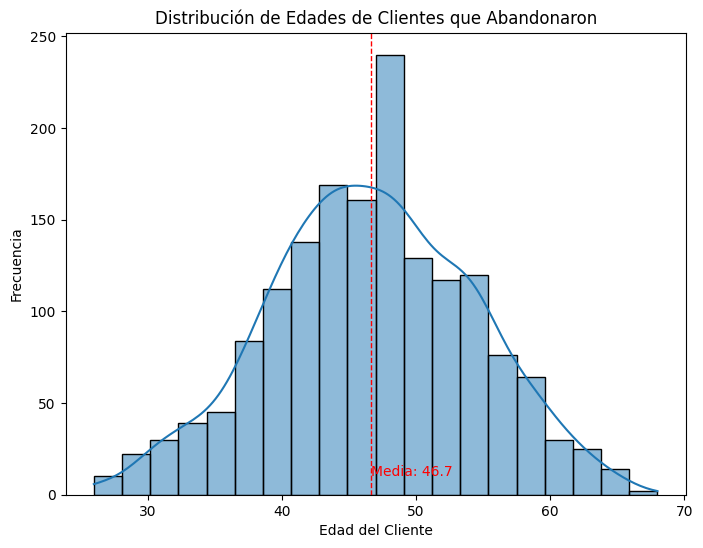

In [ ]:
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['Customer_Age'], bins=20, kde=True)  # kde=True para añadir curva de densidad
plt.title('Distribución de Edades de Clientes que Abandonaron')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia')
plt.axvline(df_filtered['Customer_Age'].mean(), color='red', linestyle='dashed', linewidth=1)  # Línea media
plt.text(df_filtered['Customer_Age'].mean(), 10, 'Media: {:.1f}'.format(df_filtered['Customer_Age'].mean()), color='red')
plt.show()

La hipótesis 1 es falsa, los clientes con una edad entre 45 y 50 son quienes más abandonan los servicios

In [ ]:
#gráfico ejecutado en Plotly para observar la representación de los "desconocidos" entre los clientes que abandonaron los servicios
order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
df_filtered['Income_Category'] = pd.Categorical(df_filtered['Income_Category'], categories=order, ordered=True)
income_counts = df_filtered['Income_Category'].value_counts().reindex(order)

income_counts_df = income_counts.reset_index()
income_counts_df.columns = ['Income_Category', 'Frequency']

fig = px.bar(income_counts_df,
             x='Income_Category',
             y='Frequency',
             title='Distribución de Ingresos de Clientes que Abandonaron',
             text='Frequency',
             width=800, height=400)
fig.show()

<ipython-input-20-8fa5c3782d60>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



La hipótesis 2 es cierta. Los clientes con ingresos más bajos tienden a abandonar el servicio de tarjetas de crédito más frecuentemente que aquellos con ingresos más altos. Además, se observa que los datos "desconocidos" aparecen en 187 registros de los 1627 relacionados a clientes que han abandonado los servicios (11,49%). Es un valor significante

In [ ]:
#Mismo gráfico que el de abajo, ecutado en Plotly para observar la representación de los "desconocidos" entre los clientes que abandonaron los servicios
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
marital_counts = df_filtered['Marital_Status'].value_counts()

marital_counts_df = marital_counts.reset_index()
marital_counts_df.columns = ['Marital_Status', 'Frequency']

fig = px.bar(marital_counts_df,
             x='Marital_Status',
             y='Frequency',
             title='Distribución del Estado Civil de Clientes que Abandonaron',
             text='Frequency',
             width=600, height=400)
fig.show()

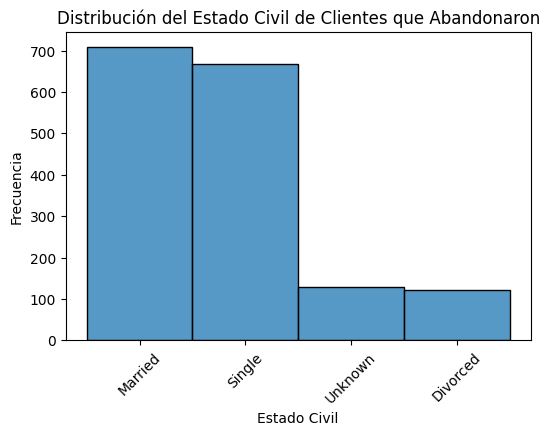

In [ ]:
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
plt.figure(figsize=(6, 4))
sns.histplot(df_filtered['Marital_Status'], discrete=True, stat='count')
plt.title('Distribución del Estado Civil de Clientes que Abandonaron')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Hipótesis 3 falsa. Los clientes solteros no tienen una tasa de abandono más alta en comparación con los clientes casados. Además, se observa que los datos "desconocidos" aparecen en 129 registros de los 1627 relacionados a clientes que han abandonado los servicios (7,93%). Es un valor significante

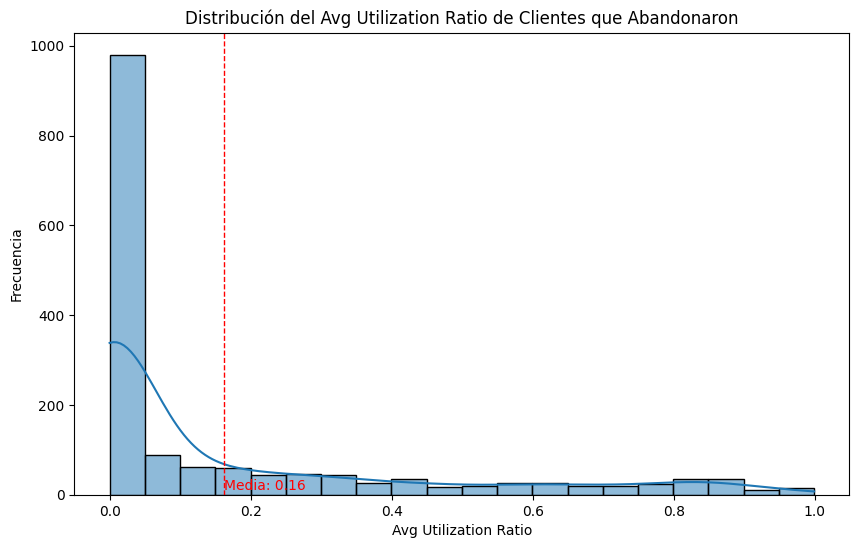

In [ ]:
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Avg_Utilization_Ratio'], bins=20, kde=True)  # kde=True para añadir una curva de densidad
plt.title('Distribución del Avg Utilization Ratio de Clientes que Abandonaron')
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Frecuencia')
plt.axvline(df_filtered['Avg_Utilization_Ratio'].mean(), color='red', linestyle='dashed', linewidth=1)  # Línea de la media
plt.text(df_filtered['Avg_Utilization_Ratio'].mean(), 10, 'Media: {:.2f}'.format(df_filtered['Avg_Utilization_Ratio'].mean()), color='red')  # Etiqueta de la media
plt.show()

Hipótesis 4 falsa. Los clientes con un alto promedio de utilización de crédito (Avg_Utilization_Ratio) NO son más propensos a abandonar su tarjeta de crédito.

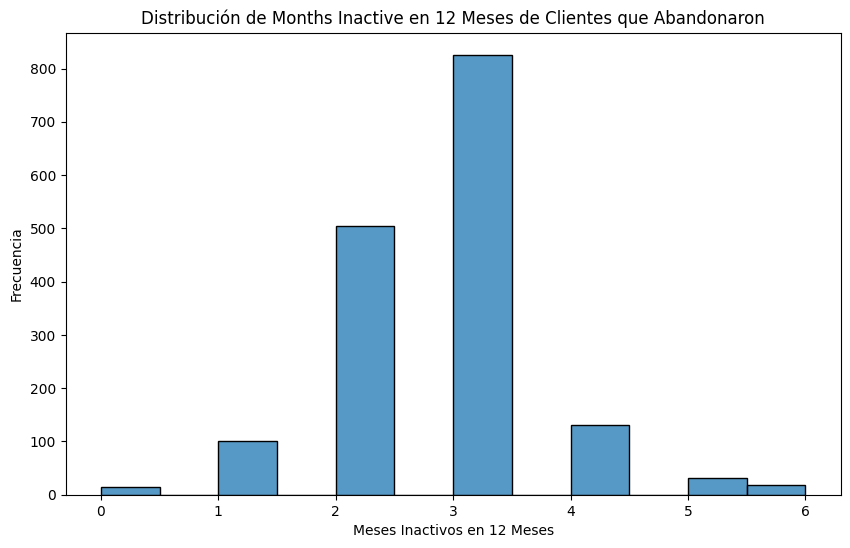

In [ ]:
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Months_Inactive_12_mon'], bins=12)
plt.title('Distribución de Months Inactive en 12 Meses de Clientes que Abandonaron')
plt.xlabel('Meses Inactivos en 12 Meses')
plt.ylabel('Frecuencia')
plt.show()

Hipótesis 5 Falsa. Los clientes que han estado inactivos durante un período de tiempo prolongado (Months_Inactive_12_mon) NO tienen una mayor probabilidad de abandonar el servicio.

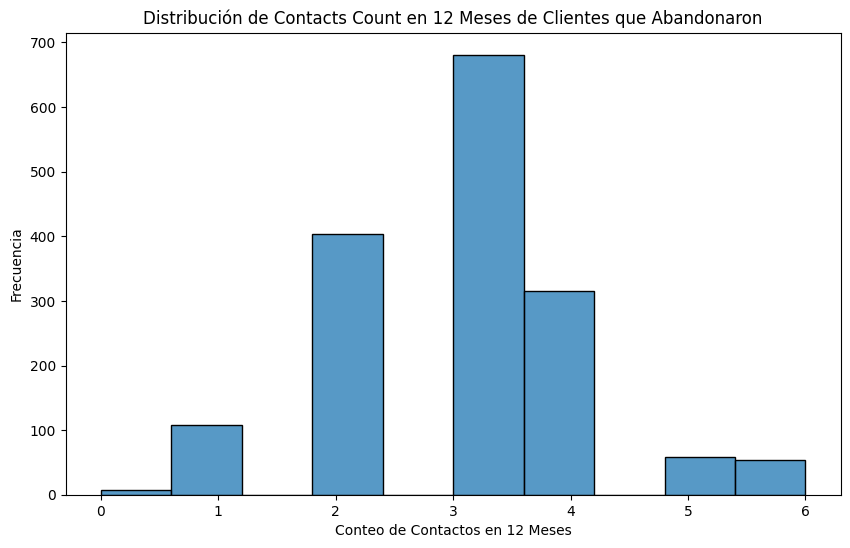

In [ ]:
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Contacts_Count_12_mon'], bins=10)
plt.title('Distribución de Contacts Count en 12 Meses de Clientes que Abandonaron')
plt.xlabel('Conteo de Contactos en 12 Meses')
plt.ylabel('Frecuencia')
plt.show()

Hipótesis 6 Verdadera. Un mayor número de contactos con el banco (Contacts_Count_12_mon) puede estar asociado con una menor tasa de abandono.

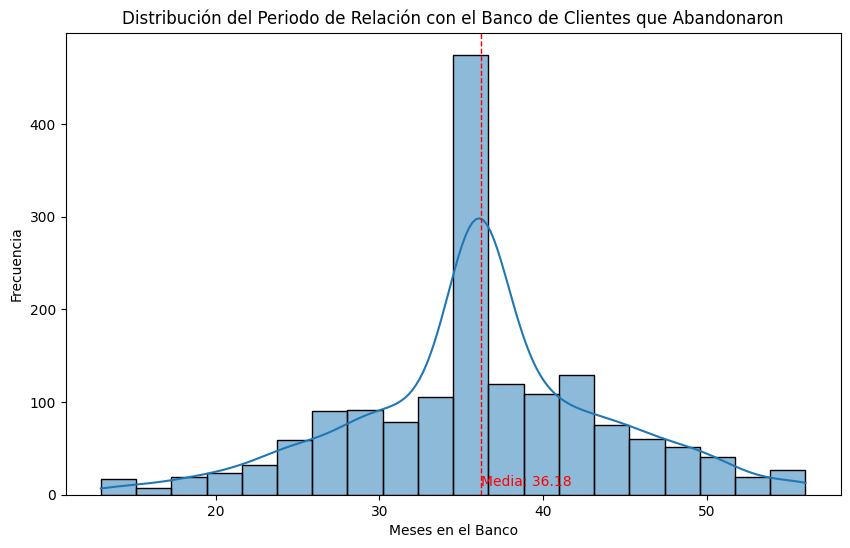

In [ ]:
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Months_on_book'], bins=20, kde=True)  # kde=True para añadir una curva de densidad
plt.title('Distribución del Periodo de Relación con el Banco de Clientes que Abandonaron')
plt.xlabel('Meses en el Banco')
plt.ylabel('Frecuencia')
plt.axvline(df_filtered['Months_on_book'].mean(), color='red', linestyle='dashed', linewidth=1)  # Línea media
plt.text(df_filtered['Months_on_book'].mean(), 10, 'Media: {:.2f}'.format(df_filtered['Months_on_book'].mean()), color='red')  # Etiqueta de la media
plt.show()

Hipótesis 7 es falsa. Los clientes con menos de 12 meses de relación con el banco NO tienen tendencia a abandonar el servicio. Estos son los clientes entre 25 y 45 meses de relación

In [ ]:
#Relación nivel de estudio de los clientes entre los que abandonaron los servicio
df_filtered = df[df['Attrition_Flag'] == 'Attrited Customer']
order = ['Unknown','Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate']
df_filtered['Education_Level'] = pd.Categorical(df_filtered['Education_Level'], categories=order, ordered=True)
education_counts = df_filtered['Education_Level'].value_counts().reindex(order)

education_counts_df = education_counts.reset_index()
education_counts_df.columns = ['Education_Level', 'Frequency']

fig = px.bar(education_counts_df,
             x='Education_Level',
             y='Frequency',
             title='Distribución del Nivel Educativo de Clientes que Abandonaron',
             text='Frequency',
             width=600, height=400)
fig.show()


<ipython-input-34-673608c389c0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Se observa que los datos "desconocidos" aparecen en 256 registros de los 1627 relacionados a clientes que han abandonado los servicios (15,73%). Es un valor significante

Análisis multivariado

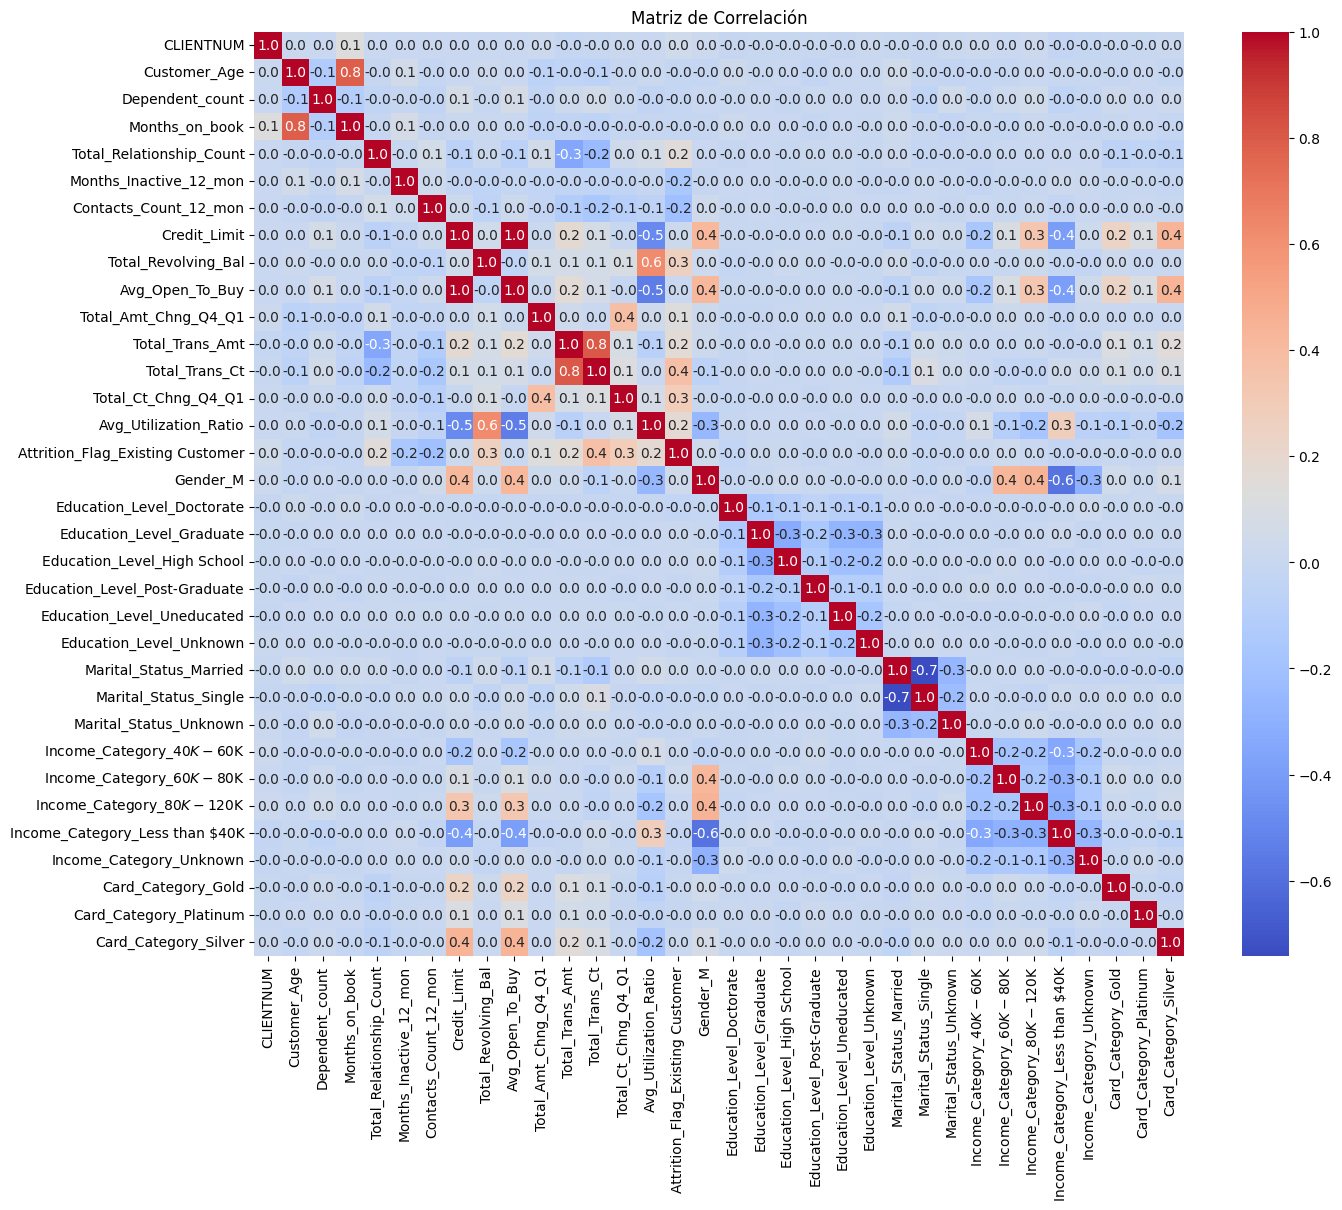

In [ ]:
#Matriz de correlación
df_encoded = pd.get_dummies(df, drop_first=True) #convierto las variables categóricas en numéricas
df_encoded.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".1f",cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Se observa una correlación directa (=1) entre Línea de crédito abierta para comprar (promedio de los últimos 12 meses) y límite de crédito de la tarjeta de crédito

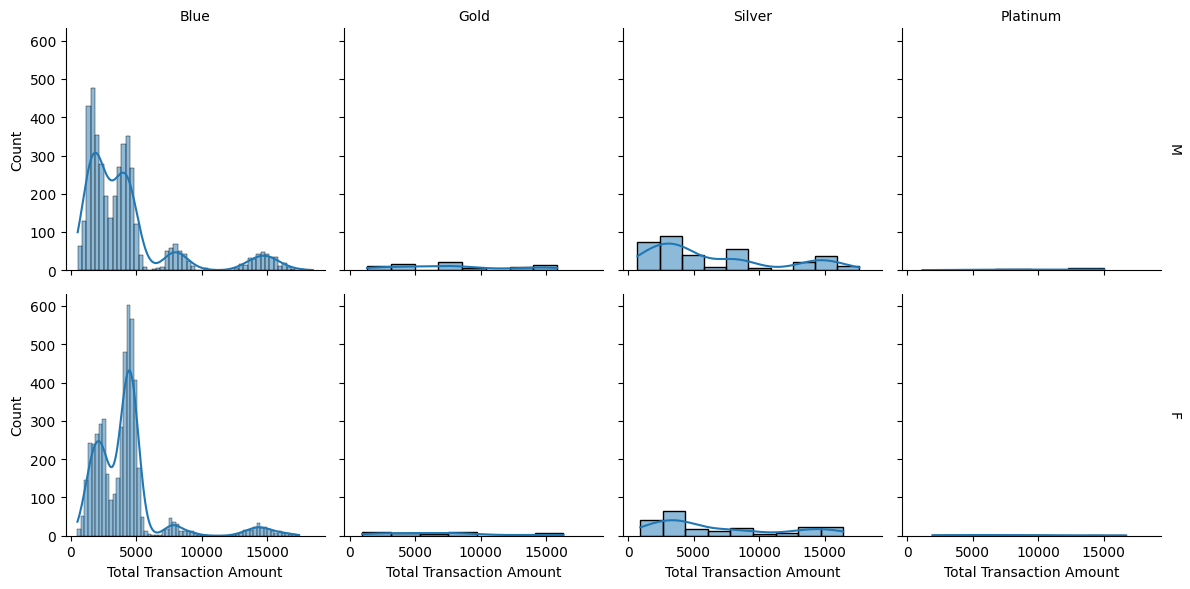

In [ ]:
#observar cómo varía el monto total de transacciones según la categoría de la tarjeta y el género
h=sns.FacetGrid(df, col='Card_Category', row='Gender', margin_titles=True).map(sns.histplot, 'Total_Trans_Amt', kde=True)
h.set_axis_labels('Total Transaction Amount', 'Count')
h.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


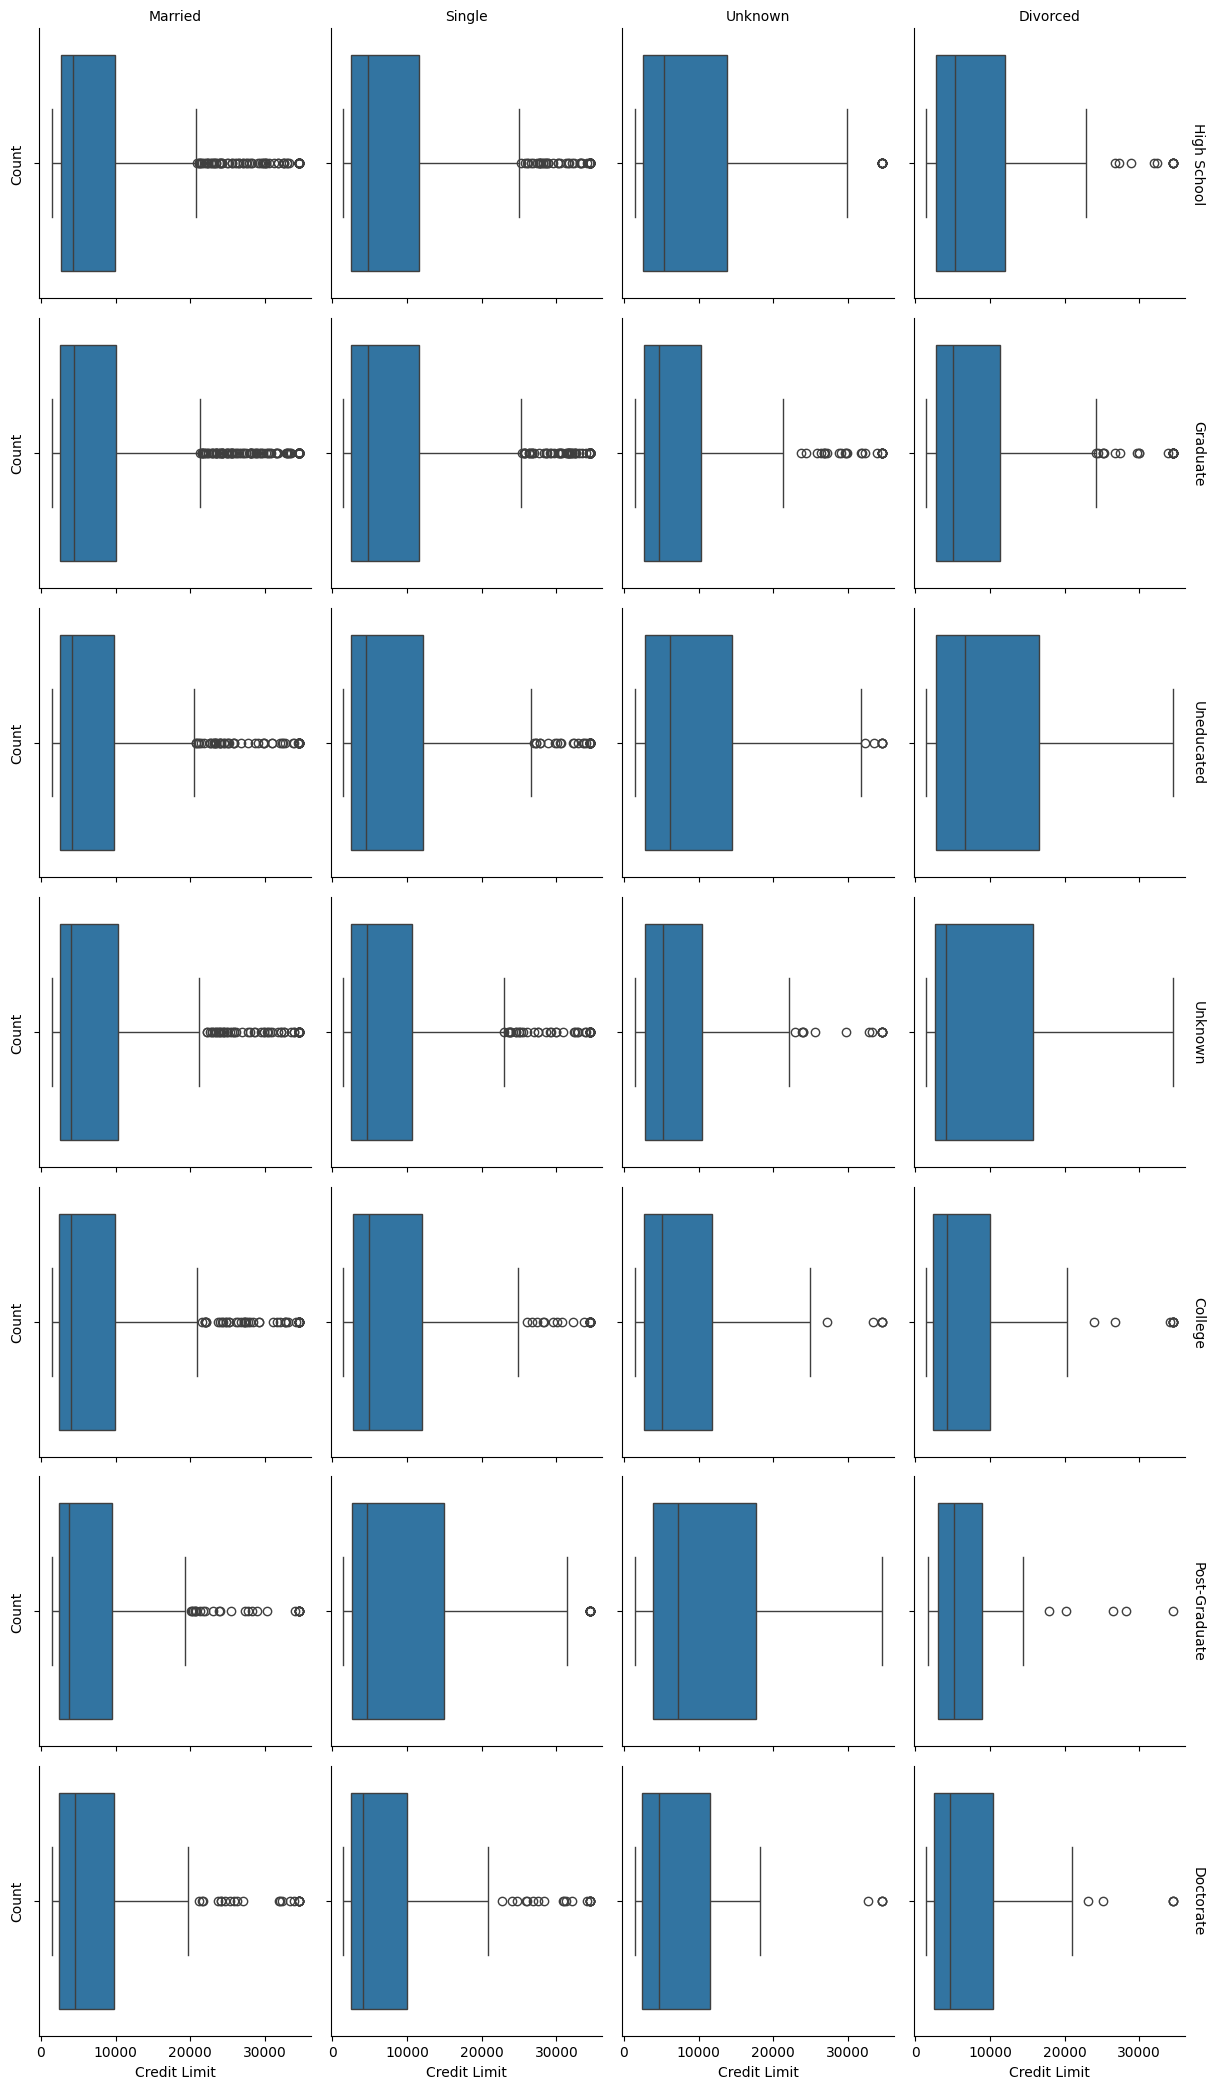

In [ ]:
#Comparación de los límites de crédito promedio entre diferentes estados civiles y niveles educativos
f = sns.FacetGrid(df, col='Marital_Status', row='Education_Level', margin_titles=True).map(sns.boxplot, 'Credit_Limit')
f.set_axis_labels('Credit Limit', 'Count')
f.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()